Load customer data

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import StrMethodFormatter

customer_data = pd.read_csv('dataset.csv')
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data info

In [393]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Show objects categories

In [335]:
customer_data[['Geography']].apply(pd.Series.value_counts)

,Geography
France,5014
Germany,2509
Spain,2477


In [336]:
customer_data[['HasCrCard','IsActiveMember','Exited']].apply(pd.Series.value_counts)

,HasCrCard,IsActiveMember,Exited
0,2945,4849,7963
1,7055,5151,2037


In [337]:
customer_data[['Gender']].apply(pd.Series.value_counts)

,Gender
Male,5457
Female,4543


In [394]:
customer_data[['NumOfProducts','Tenure']].apply(pd.Series.value_counts)

,NumOfProducts,Tenure
0,NaN,413
1,5084.0,1035
2,4590.0,1048
3,266.0,1009
4,60.0,989
5,NaN,1012
6,NaN,967
7,NaN,1028
8,NaN,1025
9,NaN,984


A summary of the numerical attributes

In [395]:
customer_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


A histogram of each numerical attribute

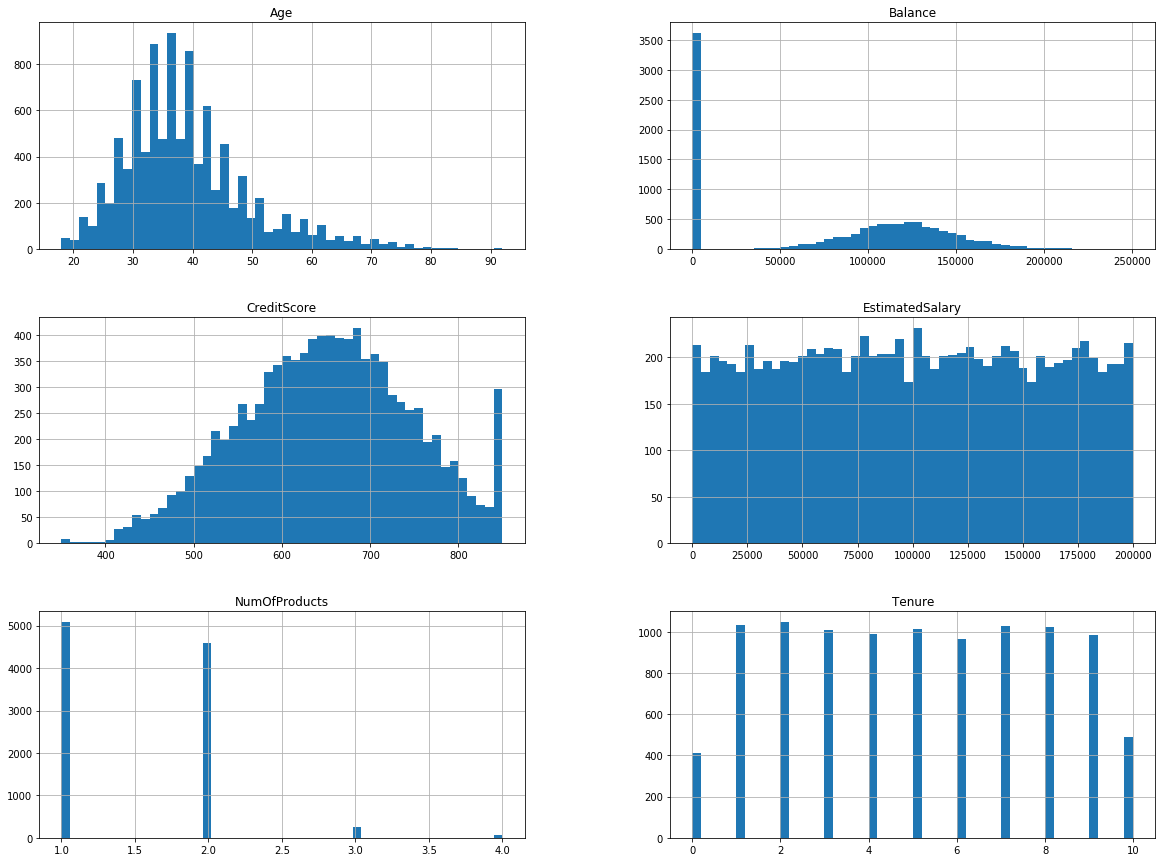

In [340]:
customer_data.hist(column=["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"],bins=50, figsize=(20,15))
plt.show()

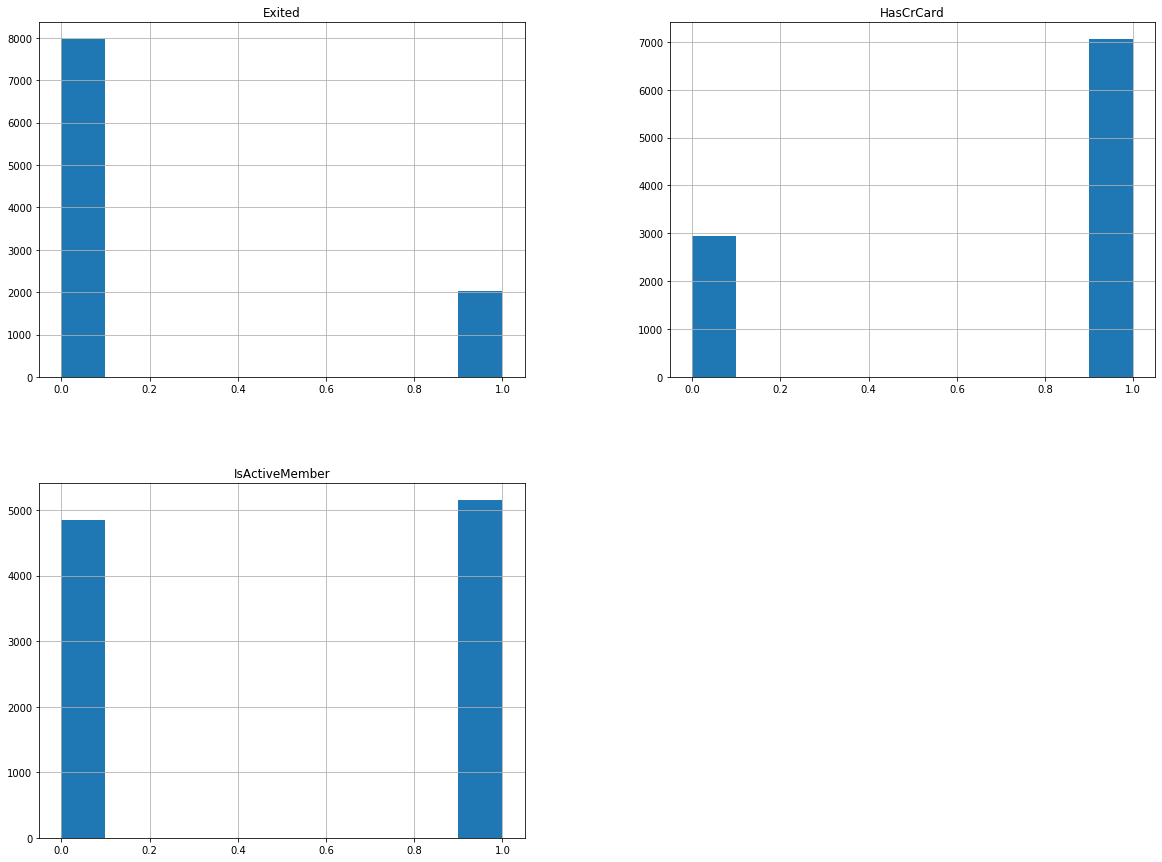

In [341]:
customer_data.hist(column=["HasCrCard","IsActiveMember","Exited"],bins=10, figsize=(20,15))
plt.show()

Split data to test and train set

In [402]:
train_set, test_set = train_test_split(customer_data, test_size=0.2, random_state=42)

Discover and Visualize the Data

In [403]:
customer_data = train_set.copy()

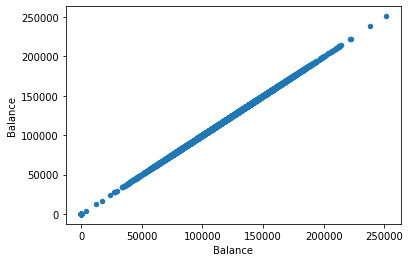

In [398]:
customer_data.plot(kind="scatter", x="Balance", y="Balance")

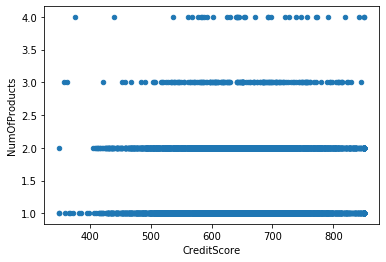

In [370]:
customer_data.plot(kind="scatter", x="CreditScore", y="NumOfProducts")

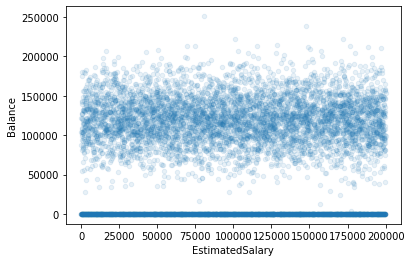

In [399]:
customer_data.plot(kind="scatter", x="EstimatedSalary", y="Balance",alpha=0.1)

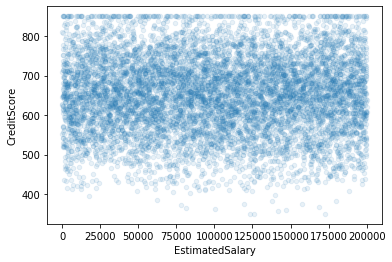

In [400]:
customer_data.plot(kind="scatter", x="EstimatedSalary", y="CreditScore",alpha=0.1)

Looking for Correlations

In [404]:
corr_matrix = customer_data.corr()
corr_matrix["CreditScore"].sort_values(ascending=False)

CreditScore        1.000000
NumOfProducts      0.025163
IsActiveMember     0.020058
CustomerId         0.017208
Balance            0.008093
EstimatedSalary   -0.002031
Tenure            -0.002797
RowNumber         -0.002857
Age               -0.003227
HasCrCard         -0.018183
Exited            -0.028383
Name: CreditScore, dtype: float64

In [405]:
corr_matrix = customer_data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance            1.000000
Exited             0.119943
Age                0.021437
EstimatedSalary    0.010088
CreditScore        0.008093
CustomerId         0.000075
Tenure            -0.005990
RowNumber         -0.007448
HasCrCard         -0.012981
IsActiveMember    -0.032976
NumOfProducts     -0.300809
Name: Balance, dtype: float64

In [406]:
corr_matrix = customer_data.corr()
corr_matrix["EstimatedSalary"].sort_values(ascending=False)

EstimatedSalary    1.000000
Tenure             0.021738
CustomerId         0.014821
Balance            0.010088
NumOfProducts      0.006017
Exited             0.002585
CreditScore       -0.002031
Age               -0.007548
HasCrCard         -0.010739
RowNumber         -0.018521
IsActiveMember    -0.022356
Name: EstimatedSalary, dtype: float64

In [376]:
corr_matrix = customer_data.corr()
corr_matrix["NumOfProducts"].sort_values(ascending=False)

NumOfProducts      1.000000
CreditScore        0.025163
Geography          0.022294
Tenure             0.016807
IsActiveMember     0.009174
EstimatedSalary    0.006017
HasCrCard          0.005625
Age               -0.035967
Exited            -0.048684
Balance           -0.300809
Name: NumOfProducts, dtype: float64

Scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07df7aa890>,
      dtype=object)

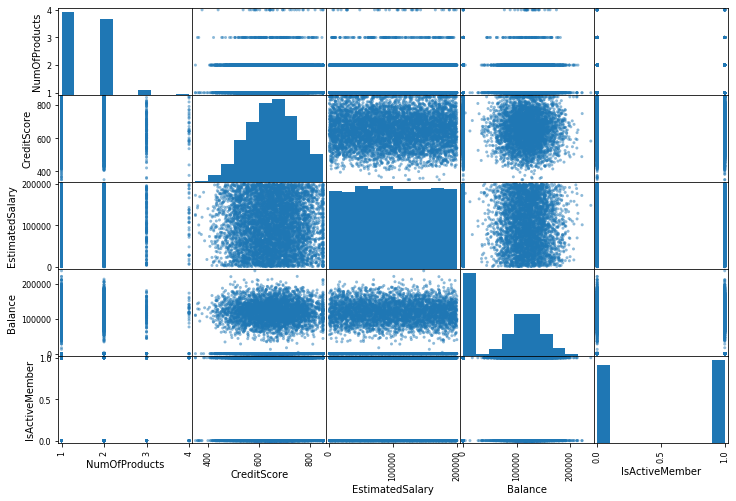

In [407]:
from pandas.plotting import scatter_matrix
attributes = ["NumOfProducts", "CreditScore", "EstimatedSalary",
"Balance","IsActiveMember"]
scatter_matrix(customer_data[attributes], figsize=(12, 8))

Handling Text and Categorical Attributes

In [411]:
encoder = LabelEncoder()
customer_data_cat = customer_data["Geography"]
customer_data_cat_encoded = encoder.fit_transform(customer_data_cat)
customer_data_cat_encoded

array([1, 2, 1, ..., 0, 2, 0])

In [412]:
print(encoder.classes_)

['France' 'Germany' 'Spain']


Feature Scaling

In [413]:
len(customer_data_cat_encoded)

6400

In [414]:
customer_data_cat

2579    Germany
7128      Spain
4082    Germany
2550     France
4926    Germany
         ...   
8871     France
9826      Spain
5268     France
9666      Spain
6090     France
Name: Geography, Length: 6400, dtype: object

In [382]:
customer_data_cat_encoded

array([1, 2, 1, ..., 0, 2, 0])

In [415]:
customer_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
7128,7129,15690372,Henry,553,Spain,Male,38,1,181110.13,2,1,0,184544.59,0
4082,4083,15669301,Romani,778,Germany,Female,29,6,150358.97,1,1,0,62454.01,1
2550,2551,15784301,Wang,850,France,Male,42,0,0.00,2,1,0,44165.84,0
4926,4927,15762927,Sung,674,Germany,Female,36,6,100762.64,1,1,0,182156.86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,8872,15699524,Howells,466,France,Female,30,3,0.00,1,1,0,193984.60,0
9826,9827,15686917,Tu,789,Spain,Female,40,4,0.00,2,1,0,137402.27,0
5268,5269,15687648,Nicholson,691,France,Male,28,1,0.00,2,0,0,92865.41,0
9666,9667,15781689,Macadam,758,Spain,Male,35,5,0.00,2,1,0,95009.60,0


In [416]:
customer_data["Geography"] = customer_data_cat_encoded

In [417]:
customer_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2579,2580,15597896,Ozoemena,365,1,Male,30,0,127760.07,1,1,0,81537.85,1
7128,7129,15690372,Henry,553,2,Male,38,1,181110.13,2,1,0,184544.59,0
4082,4083,15669301,Romani,778,1,Female,29,6,150358.97,1,1,0,62454.01,1
2550,2551,15784301,Wang,850,0,Male,42,0,0.00,2,1,0,44165.84,0
4926,4927,15762927,Sung,674,1,Female,36,6,100762.64,1,1,0,182156.86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,8872,15699524,Howells,466,0,Female,30,3,0.00,1,1,0,193984.60,0
9826,9827,15686917,Tu,789,2,Female,40,4,0.00,2,1,0,137402.27,0
5268,5269,15687648,Nicholson,691,0,Male,28,1,0.00,2,0,0,92865.41,0
9666,9667,15781689,Macadam,758,2,Male,35,5,0.00,2,1,0,95009.60,0


In [418]:
customer_data = customer_data.drop(['RowNumber','CustomerId','Surname','Gender'],axis=1)

In [387]:
customer_data

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2579,365,1,30,0,127760.07,1,1,0,81537.85,1
7128,553,2,38,1,181110.13,2,1,0,184544.59,0
4082,778,1,29,6,150358.97,1,1,0,62454.01,1
2550,850,0,42,0,0.00,2,1,0,44165.84,0
4926,674,1,36,6,100762.64,1,1,0,182156.86,0
...,...,...,...,...,...,...,...,...,...,...
8871,466,0,30,3,0.00,1,1,0,193984.60,0
9826,789,2,40,4,0.00,2,1,0,137402.27,0
5268,691,0,28,1,0.00,2,0,0,92865.41,0
9666,758,2,35,5,0.00,2,1,0,95009.60,0


In [388]:
corr_matrix = customer_data.corr()
corr_matrix["Geography"].sort_values(ascending=False)

Geography          1.000000
Balance            0.056576
Exited             0.040417
Age                0.023030
NumOfProducts      0.022294
IsActiveMember     0.018474
CreditScore        0.006535
Tenure             0.005826
EstimatedSalary   -0.002412
HasCrCard         -0.014315
Name: Geography, dtype: float64

In [389]:
corr_matrix = customer_data.corr()
corr_matrix["CreditScore"].sort_values(ascending=False)

CreditScore        1.000000
NumOfProducts      0.025163
IsActiveMember     0.020058
Balance            0.008093
Geography          0.006535
EstimatedSalary   -0.002031
Tenure            -0.002797
Age               -0.003227
HasCrCard         -0.018183
Exited            -0.028383
Name: CreditScore, dtype: float64

In [390]:
corr_matrix = customer_data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance            1.000000
Exited             0.119943
Geography          0.056576
Age                0.021437
EstimatedSalary    0.010088
CreditScore        0.008093
Tenure            -0.005990
HasCrCard         -0.012981
IsActiveMember    -0.032976
NumOfProducts     -0.300809
Name: Balance, dtype: float64

In [391]:
corr_matrix = customer_data.corr()
corr_matrix["EstimatedSalary"].sort_values(ascending=False)

EstimatedSalary    1.000000
Tenure             0.021738
Balance            0.010088
NumOfProducts      0.006017
Exited             0.002585
CreditScore       -0.002031
Geography         -0.002412
Age               -0.007548
HasCrCard         -0.010739
IsActiveMember    -0.022356
Name: EstimatedSalary, dtype: float64